# ITS02_Assigment Tugas Akhir 4_Kelompok 6

## Akses Untuk Scrapping Data dari Spotify dengan Credential
* Mengambil data langsung

In [1]:
!pip install spotipy

You should consider upgrading via the 'c:\users\bonda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
client_id = 'a6430793e3da43b9a8cbf7a048d99530'
client_secret = '8d02582819c5468fac71b916bc5906f3'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)

In [6]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Playlist 1
* First Playlist That We want to make class

In [7]:
# download playlists and convert into csv
id_test = sp.user_playlist_tracks('Spotify', 'https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0')['items'][0]['track']['id']
columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 200))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
playlist_ids = ['https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0', 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('Spotify', 'https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0')['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Justin Bieber,Anyone,0.686,0.538,2,-8.026,1,0.0345,0.181,0.000003,0.113,0.584,115.884,audio_features,31qCy5ZaophVA81wtlwLc4,spotify:track:31qCy5ZaophVA81wtlwLc4,https://api.spotify.com/v1/tracks/31qCy5ZaophV...,https://api.spotify.com/v1/audio-analysis/31qC...,190779,4
1,Ed Sheeran,Shivers,0.788,0.859,2,-2.724,1,0.0856,0.281,0,0.0424,0.822,141.02,audio_features,6bQfNiqyCX7UaQSvVVGo4I,spotify:track:6bQfNiqyCX7UaQSvVVGo4I,https://api.spotify.com/v1/tracks/6bQfNiqyCX7U...,https://api.spotify.com/v1/audio-analysis/6bQf...,207853,4
2,Shawn Mendes,Summer of Love (Shawn Mendes & Tainy),0.776,0.808,11,-4.501,1,0.117,0.0297,0.000127,0.103,0.494,123.988,audio_features,0z8hI3OPS8ADPWtoCjjLl6,spotify:track:0z8hI3OPS8ADPWtoCjjLl6,https://api.spotify.com/v1/tracks/0z8hI3OPS8AD...,https://api.spotify.com/v1/audio-analysis/0z8h...,184104,4
3,Marshmello,Leave Before You Love Me (with Jonas Brothers),0.721,0.738,7,-4.77,1,0.0403,0.00226,0.000004,0.118,0.637,119.976,audio_features,4qu63nuBpdn0qHUHuObEj1,spotify:track:4qu63nuBpdn0qHUHuObEj1,https://api.spotify.com/v1/tracks/4qu63nuBpdn0...,https://api.spotify.com/v1/audio-analysis/4qu6...,154983,4
4,Surfaces,Wave of You,0.695,0.656,1,-6.038,1,0.0489,0.057,0,0.267,0.346,90.986,audio_features,5Ne1q9Hv3l2NHBA3Agt8WT,spotify:track:5Ne1q9Hv3l2NHBA3Agt8WT,https://api.spotify.com/v1/tracks/5Ne1q9Hv3l2N...,https://api.spotify.com/v1/audio-analysis/5Ne1...,213842,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
playlist_ids = ['https://open.spotify.com/playlist/4161XWuQ952QOzN4RrzUgj?si=1a1019ce8f234490', 'https://open.spotify.com/playlist/7nBBNHZnApqArBTB5s9xbT?si=f0428d7fcb29421e']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('sameeha', 'https://open.spotify.com/playlist/7nBBNHZnApqArBTB5s9xbT?si=f0428d7fcb29421e')['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks


,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Justin Bieber,Holy - Acoustic,0.532,0.566,6,-6.511,1,0.0467,0.706,0,0.161,0.576,79.927,audio_features,6gcQJ6W4H89xkQFm63gcsB,spotify:track:6gcQJ6W4H89xkQFm63gcsB,https://api.spotify.com/v1/tracks/6gcQJ6W4H89x...,https://api.spotify.com/v1/audio-analysis/6gcQ...,205816,4
1,Faouzia,You Don't Even Know Me,0.577,0.663,6,-4.788,0,0.0374,0.244,0.000077,0.0795,0.338,165.938,audio_features,4wk9RMAmnUqFdgpBjplA4g,spotify:track:4wk9RMAmnUqFdgpBjplA4g,https://api.spotify.com/v1/tracks/4wk9RMAmnUqF...,https://api.spotify.com/v1/audio-analysis/4wk9...,179397,4
2,Faouzia,This Mountain,0.675,0.93,11,-3.131,0,0.069,0.215,0,0.0638,0.595,129.965,audio_features,0NYJUJaDCvrkMQQt4WSrVU,spotify:track:0NYJUJaDCvrkMQQt4WSrVU,https://api.spotify.com/v1/tracks/0NYJUJaDCvrk...,https://api.spotify.com/v1/audio-analysis/0NYJ...,142259,4
3,Faouzia,Tears of Gold,0.587,0.664,5,-5.698,0,0.0523,0.128,0,0.323,0.617,149.957,audio_features,2YyLNljkMy2viVcXoFGTDY,spotify:track:2YyLNljkMy2viVcXoFGTDY,https://api.spotify.com/v1/tracks/2YyLNljkMy2v...,https://api.spotify.com/v1/audio-analysis/2YyL...,176118,4
4,Alessia Cara,Out Of Love,0.481,0.267,7,-9.249,1,0.0339,0.8,0,0.249,0.137,117.64,audio_features,4WzhjxvLP95y7AMDy0Atwb,spotify:track:4WzhjxvLP95y7AMDy0Atwb,https://api.spotify.com/v1/tracks/4WzhjxvLP95y...,https://api.spotify.com/v1/audio-analysis/4Wzh...,227693,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Download File Ke CSV
playlist_tracks.to_csv('file_spotifyplaylist_MoodBooster.csv', encoding='utf-8', index = False)


#playlist_tracks.to_csv(r'/content/sample_data', index = False, header = True)

### Playlist 2

In [13]:
id_test = sp.user_playlist_tracks('Spotify', 'https://open.spotify.com/playlist/37i9dQZF1DWTwnEm1IYyoj')['items'][0]['track']['id']
columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 200))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
playlist_ids = ['https://open.spotify.com/playlist/37i9dQZF1DWTwnEm1IYyoj', 'https://open.spotify.com/playlist/37i9dQZF1DWTwnEm1IYyoj']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('Spotify', 'https://open.spotify.com/playlist/37i9dQZF1DWTwnEm1IYyoj')['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Taylor Swift,willow,0.392,0.574,7,-9.195,1,0.17,0.833,0.00179,0.145,0.529,81.112,audio_features,0lx2cLdOt3piJbcaXIV74f,spotify:track:0lx2cLdOt3piJbcaXIV74f,https://api.spotify.com/v1/tracks/0lx2cLdOt3pi...,https://api.spotify.com/v1/audio-analysis/0lx2...,214707,4
1,Sam Smith,I'm Not The Only One,0.453,0.496,5,-5.785,1,0.0453,0.554,0.000027,0.0772,0.501,80.994,audio_features,0fioLzGM8ngbD1w6fMmm45,spotify:track:0fioLzGM8ngbD1w6fMmm45,https://api.spotify.com/v1/tracks/0fioLzGM8ngb...,https://api.spotify.com/v1/audio-analysis/0fio...,239317,4
2,John Legend,All of Me,0.422,0.264,8,-7.064,1,0.0322,0.922,0,0.132,0.331,119.93,audio_features,3U4isOIWM3VvDubwSI3y7a,spotify:track:3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/tracks/3U4isOIWM3Vv...,https://api.spotify.com/v1/audio-analysis/3U4i...,269560,4
3,Adele,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.578,0,0.133,0.13,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4
4,James Arthur,September,0.641,0.551,9,-6.165,1,0.0532,0.147,0,0.12,0.417,102.912,audio_features,22eqegdVyWgAQAwLkm7L9b,spotify:track:22eqegdVyWgAQAwLkm7L9b,https://api.spotify.com/v1/tracks/22eqegdVyWgA...,https://api.spotify.com/v1/audio-analysis/22eq...,220891,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Rachel Platten,Fight Song,0.564,0.714,7,-4.987,1,0.129,0.0549,0,0.155,0.33,175.924,audio_features,37f4ITSlgPX81ad2EvmVQr,spotify:track:37f4ITSlgPX81ad2EvmVQr,https://api.spotify.com/v1/tracks/37f4ITSlgPX8...,https://api.spotify.com/v1/audio-analysis/37f4...,204013,4
196,Charlie Puth,We Don't Talk Anymore (feat. Selena Gomez),0.728,0.563,1,-8.053,0,0.134,0.621,0,0.179,0.352,100.017,audio_features,37FXw5QGFN7uwwsLy8uAc0,spotify:track:37FXw5QGFN7uwwsLy8uAc0,https://api.spotify.com/v1/tracks/37FXw5QGFN7u...,https://api.spotify.com/v1/audio-analysis/37FX...,217707,4
197,The Script,Breakeven,0.627,0.699,10,-4.504,1,0.0244,0.174,0,0.0789,0.535,94.003,audio_features,38xWaVFKaxZlMFvzNff2aW,spotify:track:38xWaVFKaxZlMFvzNff2aW,https://api.spotify.com/v1/tracks/38xWaVFKaxZl...,https://api.spotify.com/v1/audio-analysis/38xW...,261427,4
198,Coldplay,Fix You,0.209,0.417,3,-8.74,1,0.0338,0.164,0.00196,0.113,0.124,138.178,audio_features,7LVHVU3tWfcxj5aiPFEW4Q,spotify:track:7LVHVU3tWfcxj5aiPFEW4Q,https://api.spotify.com/v1/tracks/7LVHVU3tWfcx...,https://api.spotify.com/v1/audio-analysis/7LVH...,295533,4


In [15]:
playlist_tracks.to_csv('file_spotifyplaylist_SoftPop.csv', encoding='utf-8', index = False)

#playlist_tracks.to_csv(r'/content/sample_data', index = False, header = True)

## Data Preparation
* Acquire and Cleansing the data

In [16]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns

In [20]:
# Read in csv file to each playlist and graph each attribute to spot differences.
moodboost = pd.read_csv("C:/Users/bonda/OneDrive/Documents/ITS/Microcredential Data Scientist/Final Project/From Github/MSIB_CapsProject/file_spotifyplaylist_MoodBooster.csv")
softpop = pd.read_csv("C:/Users/bonda/OneDrive/Documents/ITS/Microcredential Data Scientist/Final Project/From Github/MSIB_CapsProject/file_spotifyplaylist_SoftPop.csv")

Text(0.5, 1.0, 'Intensitas Energi dari semua lagu di kedua playlist')

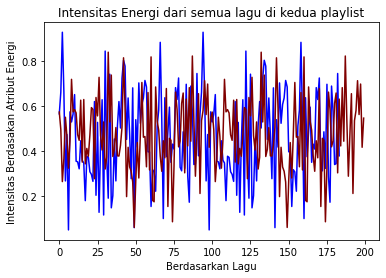

In [22]:
#  attributes berdasarkan energi
# Grafik Mencari Atribut dan Perpotongan
plt.plot(moodboost.energy, color='blue')
plt.plot(softpop.energy, color='maroon')
plt.xlabel("Berdasarkan Lagu")
plt.ylabel("Intensitas Berdasakan Atribut Energi")
plt.title("Intensitas Energi dari semua lagu di kedua playlist")

Text(0.5, 1.0, 'Intensitas loudness dari semua lagu di kedua playlist')

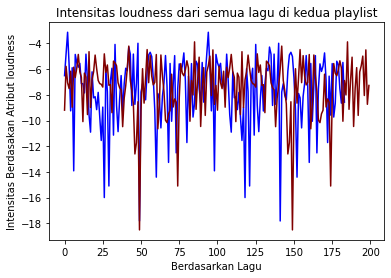

In [24]:
#  attributes berdasarkan loudness
plt.plot(moodboost.loudness, color='blue')
plt.plot(softpop.loudness, color='maroon')
plt.xlabel("Berdasarkan Lagu")
plt.ylabel("Intensitas Berdasakan Atribut loudness")
plt.title("Intensitas loudness dari semua lagu di kedua playlist")

Text(0.5, 1.0, 'Intensitas acousticness dari semua lagu di kedua playlist')

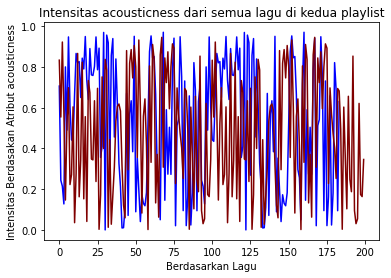

In [25]:
#  attributes berdasarkan acousticness
plt.plot(moodboost.acousticness, color='blue')
plt.plot(softpop.acousticness, color='maroon')
plt.xlabel("Berdasarkan Lagu")
plt.ylabel("Intensitas Berdasakan Atribut acousticness")
plt.title("Intensitas acousticness dari semua lagu di kedua playlist")

In [ ]:
# Mount From Collab
# In this Case We use the local terminal for upload in github, We doesn't use this
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Once you choose the attributes with the largest differences between the 2 playlists, combine both playlists datasets keeping wanted attributes then read in the new csv file
gabungan = pd.read_csv("C:/Users/bonda\OneDrive\Documents/ITS/Microcredential Data Scientist/Final Project/From Github/MSIB_CapsProject/file_spotifyplaylist_all2.csv")
gabungan.head()


,danceability,energy,loudness,speechiness,acousticness,liveness,valence,target
0,0.392,0.574,-9.195,0.1700,0.833,0.1450,0.529,0
1,0.453,0.496,-5.785,0.0453,0.554,0.0772,0.501,0
2,0.422,0.264,-7.064,0.0322,0.922,0.1320,0.331,0
3,0.604,0.366,-7.519,0.0282,0.578,0.1330,0.130,0
4,0.641,0.551,-6.165,0.0532,0.147,0.1200,0.417,0


In [27]:
# check for null values
gabungan.isnull().values.any()

False

In [29]:
# check for integer datatypes (numpy arrays only work with integers)
gabungan.dtypes

danceability    float64
energy          float64
loudness        float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
target            int64
dtype: object

In [30]:
gabungan['danceability']=gabungan['danceability'].astype(int)

In [31]:
# check for integer datatypes (numpy arrays only work with integers)
# In[9]:
gabungan.dtypes

danceability      int32
energy          float64
loudness        float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
target            int64
dtype: object

## Now This Is The Main Menu
* KNN Algorithm
* Klasifikasi Menggunakan KNN Classifier

In [32]:
# Normalize/Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(gabungan.drop('target', axis=1))

StandardScaler()

In [33]:
scaled_features = scaler.transform(gabungan.drop('target',axis=1))
scaled_features

array([[ 0.        ,  0.06551413, -1.10694408, ...,  1.6113067 ,
        -0.02373036,  0.48830976],
       [ 0.        , -0.35494424,  0.48371664, ...,  0.68867013,
        -0.69828512,  0.35067081],
       [ 0.        , -1.60553836, -0.11289775, ...,  1.90562445,
        -0.15306977, -0.48499424],
       ...,
       [ 0.        , -1.17429901, -0.85318471, ...,  1.12518636,
         0.70256016, -0.37684935],
       [ 0.        ,  0.99267874,  0.62505687, ..., -0.8302079 ,
         0.77220446, -0.02292062],
       [ 0.        , -0.98563179, -0.8168001 , ...,  0.93999766,
        -0.48835731, -1.00605598]])

In [34]:
# below is the pandas dataframe with the standardized values
gabungan_feat = pd.DataFrame(scaled_features, columns = gabungan.columns[:-1])
gabungan_feat.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence
0,0.0,0.065514,-1.106944,2.586405,1.611307,-0.023730,0.488310
1,0.0,-0.354944,0.483717,-0.298693,0.688670,-0.698285,0.350671
2,0.0,-1.605538,-0.112898,-0.601779,1.905624,-0.153070,-0.484994
3,0.0,-1.055708,-0.325141,-0.694324,0.768037,-0.143121,-1.473045
4,0.0,-0.058467,0.306458,-0.115917,-0.657255,-0.272460,-0.062246


In [35]:
#  Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = gabungan_feat
y = gabungan['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True)


In [36]:
# Train model
# find k value


import math
math.sqrt(len(y_test))


10.770329614269007

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [38]:
# Make predictions
prediction = knn.predict(X_test)
prediction


array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0], dtype=int64)

In [39]:
# Evaluate Predictions using the Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        66
           1       0.65      0.64      0.65        50

    accuracy                           0.70       116
   macro avg       0.69      0.69      0.69       116
weighted avg       0.70      0.70      0.70       116



In [40]:
#  Evaluate alternative K-values for better predictions
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))


Text(0, 0.5, 'error rate')

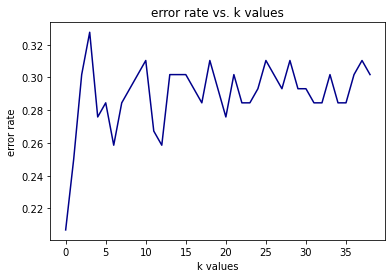

In [41]:
# Plot error rate
plt.plot(error_rate, color='darkblue')
plt.title('error rate vs. k values')
plt.xlabel('k values')
plt.ylabel('error rate')

In [42]:
# Adjust K value according to the graph (lowest error rate)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
prediction= knn.predict(X_test)
prediction

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        66
           1       0.70      0.60      0.65        50

    accuracy                           0.72       116
   macro avg       0.71      0.70      0.70       116
weighted avg       0.71      0.72      0.71       116

